# BT2101 DISRUDY GROUP PROJECT

---



## Table of Contents
1. Problem Description (Brief Write Up)
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Model Selection
5. Evaluation
6. Discussion and Possible Improvements

## 1. Problem Description

The data set we will be working on contains payment information of 30,000 credit card holders obtained from a bank in Taiwan. 

Each data sample is described by 23 feature attributes and a binary target feature (default or not) valued 0 (= not default) or 1 (= default). 

The 23 explanatory attributes are:

### X1 - X5: Indivual attributes of customer

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

### X6 - X11: Repayment history from April to Septemeber 2005
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months, . . . 8 = payment delay for eight months; 9 = payment delay for nine months and above.


X6 = the repayment status in September, 2005

X7 = the repayment status in August, 2005

X8 = the repayment status in July, 2005

X9 = the repayment status in June, 2005

X10 = the repayment status in May, 2005

X11 = the repayment status in April, 2005. 

### X12 - X17: Amount of bill statement (NT dollar) from April to September 2005

X12 = amount of bill statement in September, 2005; 

X13 = amount of bill statement in August, 2005

. . .

X17 = amount of bill statement in April, 2005. 

### X18 - X23: Amount of previous payment (NT dollar)
X18 = amount paid in September, 2005

X19 = amount paid in August, 2005

. . .

X23 = amount paid in April, 2005. 


## EDA

In this section we will explore the data set, its shape and its features to get an idea of the data.

### Importing packages and the dataset

In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
url = 'https://raw.githubusercontent.com/reonho/bt2101disrudy/master/card.csv'
df = pd.read_csv(url,  header = 1, index_col = 0)
# Dataset is now stored in a Pandas Dataframe
df0 = df

In [0]:
#rename the target variable to "Y" for convenience
df["Y"] = df["default payment next month"] 
df = df.drop("default payment next month", axis = 1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
size = df.shape
print("Data has {} Columns and {} Rows".format(size[1], size[0]))

Data has 24 Columns and 30000 Rows


In [0]:
#check for null values
df.isnull().any().sum() 

0

There are no null values in the data.

We can also calculate some summary statistics for each attribute.

In [0]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Exploring the features

**1) Exploring target attribute:**


In [0]:
All = df.shape[0]
default = df[df['Y'] == 1]
nondefault = df[df['Y'] == 0]

x = len(default)/All
y = len(nondefault)/All

print('defaults :',x*100,'%')
print('non defaults :',y*100,'%')

defaults : 22.12 %
non defaults : 77.88000000000001 %


Text(0, 0.5, 'Frequency')

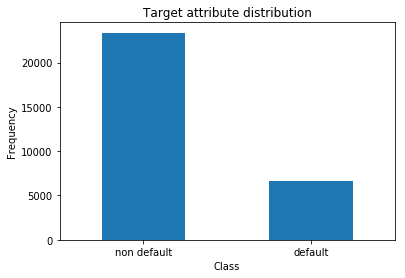

In [0]:
# plotting target attribute against frequency
labels = ['non default','default']
classes = pd.value_counts(df['Y'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Target attribute distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

**2) Exploring categorical attributes**

Categorical attributes are:
- Sex
- Education
- Marriage

**2a) Checking formatting for categorical attributes:**

Since all categorical attributes are in numerical format, there is no need to convert them into numerical factors.

**2b) Analysis of categorical data groups**

- Sex
- Education
- Marriage

In [0]:
print(df["SEX"].value_counts().apply(lambda r: r/All*100))
print("--------------------------------------------------------")
print(df["EDUCATION"].value_counts().apply(lambda r: r/All*100))
print("--------------------------------------------------------")
print(df["MARRIAGE"].value_counts().apply(lambda r: r/All*100))

2    60.373333
1    39.626667
Name: SEX, dtype: float64
--------------------------------------------------------
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: EDUCATION, dtype: float64
--------------------------------------------------------
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64


**Conclusion**

- Categorical variable SEX does not seem to have any missing/extra groups, and it is separated into Male = 1 and Female = 2
- Categorical variable MARRIAGE seems to have unknown group = 0, which could be assumed to be missing data, with other groups being Married = 1, Single = 2, Others = 3
- Categorical variable EDUCATION seems to have unknown group = 0,5,6, with other groups being graduate school = 1, university = 2, high school = 3, others = 4

**2c) Analysing the relationship between categorical attributes and default paymment (target attribute)**

- Sex
- Education
- Marriage



In [0]:
#proportion of target attribute (for reference)
print('Total target attributes:')
print('non defaults :',y*100,'%')
print('defaults :',x*100,'%')
print("--------------------------------------------------------")
#analysing default payment with Sex
sex_target = pd.crosstab(df["Y"], df["SEX"]).apply(lambda r: r/r.sum()*100).rename(columns = {1: "Male", 2: "Female"}, index = {0: "non defaults", 1: "defaults"})
print(sex_target)
print("--------------------------------------------------------")
#analysing default payment with education
education_target = pd.crosstab(df["Y"], df["EDUCATION"]).apply(lambda r: r/r.sum()*100).rename(index = {0: "non defaults", 1: "defaults"})
print(education_target)
print("--------------------------------------------------------")
#analysing default payment with marriage
marriage_target = pd.crosstab(df["Y"], df["MARRIAGE"]).apply(lambda r: r/r.sum()*100).rename(columns = {0: "unknown",1: "married", 2: "single", 3: "others"},index = {0: "non defaults", 1: "defaults"})
print(marriage_target)

Total target attributes:
non defaults : 77.88000000000001 %
defaults : 22.12 %
--------------------------------------------------------
SEX                Male     Female
Y                                 
non defaults  75.832773  79.223719
defaults      24.167227  20.776281
--------------------------------------------------------
EDUCATION         0          1          2  ...          4          5          6
Y                                          ...                                 
non defaults  100.0  80.765234  76.265146  ...  94.308943  93.571429  84.313725
defaults        0.0  19.234766  23.734854  ...   5.691057   6.428571  15.686275

[2 rows x 7 columns]
--------------------------------------------------------
MARRIAGE        unknown    married     single     others
Y                                                       
non defaults  90.740741  76.528296  79.071661  73.993808
defaults       9.259259  23.471704  20.928339  26.006192


In [0]:
# we would like to conduct a chi square test of independence using the contingency tables above
import scipy.stats as sp_stat

def sigf(p, confidence):
  return str(p) + " *** [Significant at the " + str(int(confidence*100)) + "% Level]" if p < 1-confidence else p

#print the p values for the test statistic of each chi-sq test
print("SEX:", sigf(sp_stat.chi2_contingency(sex_target)[1], 0.95))
print("EDUCATION:", sigf(sp_stat.chi2_contingency(education_target)[1],0.95))
print("MARRIAGE:", sigf(sp_stat.chi2_contingency(marriage_target)[1],0.95))

SEX: 0.6854422910010494
EDUCATION: 1.0276815835411287e-08 *** [Significant at the 95% Level]
MARRIAGE: 0.016161318279331434 *** [Significant at the 95% Level]


**Conclusion**

Categorical attributes EDUCATION and MARRIAGE are associated with the target variable.

We will omit SEX from our models as it is statistically insignificant.

Categorical attributes SEX and MARRIAGE have approximately uniform distributions throughout groups of categories.

**3) Analysis of Numerical Attributes**

The numerical attributes are:
   




In [0]:
#printing numerical attributes
pd.DataFrame(df.drop(['SEX', 'EDUCATION', 'MARRIAGE','Y'], axis = 1).columns)

,0
0,LIMIT_BAL
1,AGE
2,PAY_0
3,PAY_2
4,PAY_3
5,PAY_4
6,PAY_5
7,PAY_6
8,BILL_AMT1
9,BILL_AMT2


**Meaning of attributes PAY_0 to PAY_6**

The numeric value in these attributes shows the past history of a credit card holder, example -2 means: No consumption of credit card, -1 means that holder paid the full balance, 0 means the use of revolving credit; 1= paymentdelay of one month; 2= payment delay of two months and so on.



**3a) Limit Balance**

In [0]:
#Find out min and max value of LIMIT BALANCE
print(df["LIMIT_BAL"].describe())

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


Text(0.5, 1.0, 'Distribution of Limit Balance')

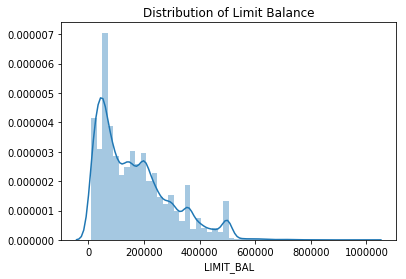

In [0]:
sns.distplot(df["LIMIT_BAL"]).set_title('Distribution of Limit Balance')

**3b) Analysis of Age**

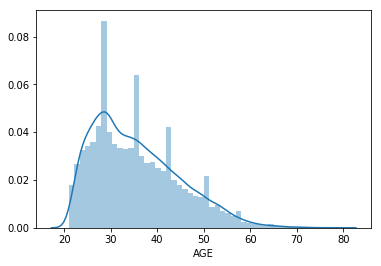

In [0]:
sns.distplot(df.AGE)

To find out the relationships between the features, we calculate the absolute value of R with the target for all attributes. R = Correlation Coefficient


In [0]:
#absolute correlation coefficient
pd.DataFrame(df.drop(['SEX', 'EDUCATION', 'MARRIAGE','Y'], axis=1).apply(lambda x: x.corr(df.Y) if x.corr(df.Y) > 0 else -x.corr(df.Y)).sort_values(ascending = False))

,0
PAY_0,0.324794
PAY_2,0.263551
PAY_3,0.235253
PAY_4,0.216614
PAY_5,0.204149
PAY_6,0.186866
LIMIT_BAL,0.153520
PAY_AMT1,0.072929
PAY_AMT2,0.058579
PAY_AMT4,0.056827


We observe that the "repayment status" attributes are the most highly correlated with the target variable and we would expect them to be more significant in predicting credit default. In fact the later the status, the more correlated it is.

The least correlated attributes are the bill amounts.

We can also generate a correlation matrix (heatmap) to see which features are the most correlated with each other.

Text(0.5, 1.05, 'Correlation Matrix')

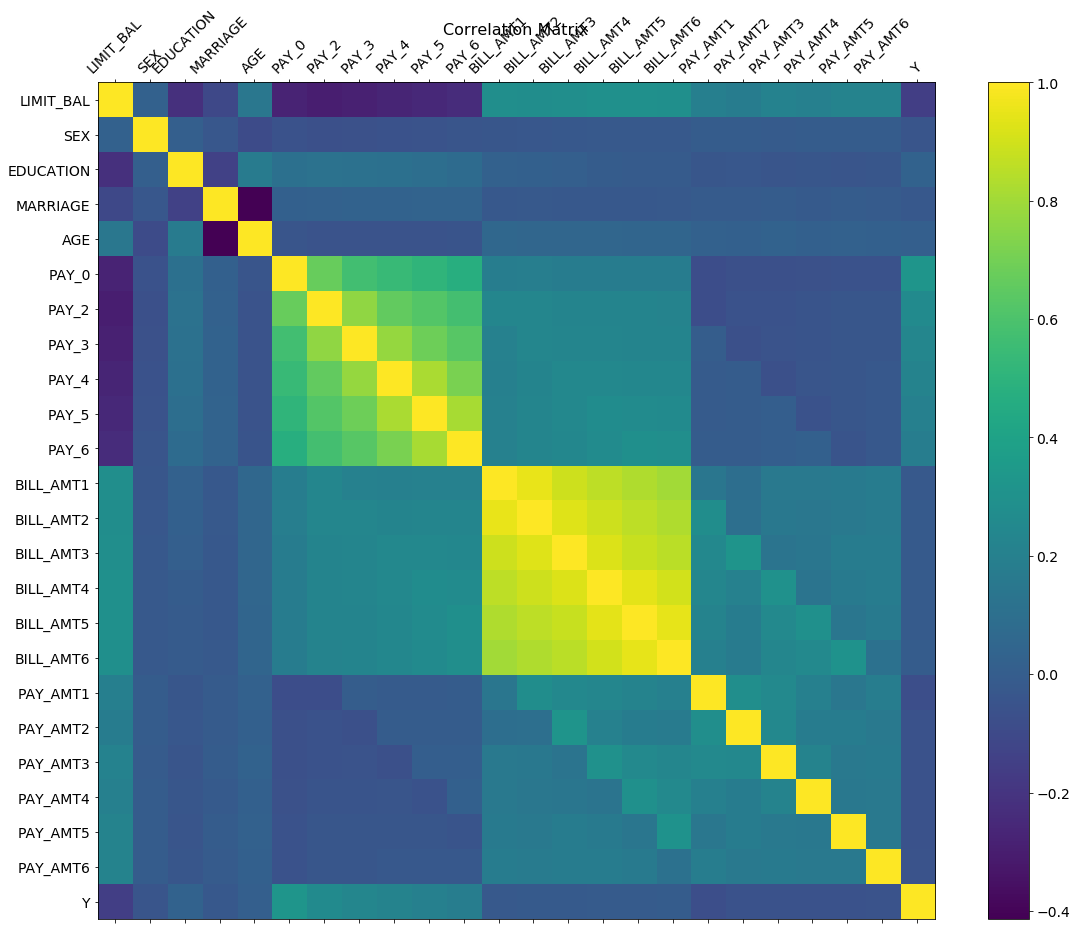

In [0]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

The heatmap reveals that the payment and billed amounts across the 5 months are highly correlated with each other.  Highly Correlated factors should be removed before carrying out any regression to prevent multicollinearity.

- Linear regression
- Scatterplot matrix
- Boxplot matrix

## Data Preprocessing


???
1. get rid of unknown attributes
2. normalise
3. pca?


## Model Selection

In this part, we will fit machine learning models learnt in BT2101 to this classification problem, and pick the model that can produce the best results.

We will be attempting to fit the following models:
- K-Nearest Neighbour
- Support Vector Machine
- Decision Tree 
- Naive Bayes Classifier
- Logistic Regression
- Neural Network

We will then try to improve performance by ensembling i.e. Random Forest.


In [0]:
#using kfold to create train test splits
import sklearn.model_selection as skm
kf = skm.KFold(10)

In [0]:
#using holdout sampling for train test split
ft = df.drop("Y", axis = 1)
target = df["Y"]
X_train,X_test,y_train,y_test = skm.train_test_split(ft,target,test_size=0.20)

### Baseline - Random Classifier (Test)
This part aims to provide a benchmark accuracy for our models, i.e. a random classifier with (expected) accuracy of 0.5.

In [0]:
from random import *
import sklearn.metrics as skmt

def rnjezus(i):
  return randint(0, 1)

# Holdout sampling
print("Holdout Sample Accuracy:")
print(skmt.classification_report(y_test, list(map(lambda x : rnjezus(x), range(len(X_test))))))

# K-fold
accuracies = []
for train,test in kf.split(df):
  prediction = list(map(lambda x : rnjezus(x), test))
  actual = list(df["Y"][test+1])
  
  #By definition the columns correspond to the predicted values and rows are the actuals
  conf_mat = skmt.confusion_matrix(actual, prediction)
  #print(pd.DataFrame(conf_mat))

  accuracies.append(skmt.accuracy_score(actual, prediction))

print("Kfold Average Accuracy:", sum(accuracies)/len(accuracies))

Holdout Sample Accuracy:
              precision    recall  f1-score   support

           0       0.77      0.49      0.60      4706
           1       0.21      0.48      0.29      1294

    accuracy                           0.49      6000
   macro avg       0.49      0.48      0.44      6000
weighted avg       0.65      0.49      0.53      6000

Kfold Average Accuracy: 0.4963333333333333


### Model 1 - K-Nearest Neighbour

In [0]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))
                                
for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train,y_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel())


'                                     \nfor i,k in enumerate(neighbours):\n    #Setup a knn classifier with k neighbors\n    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)\n    \n    #Fit the model\n    knn.fit(X_train,y_train.ravel())\n    \n    #Compute accuracy on the training set\n    train_accuracy[i] = knn.score(X_train, y_train.ravel())\n    \n    #Compute accuracy on the test set\n    test_accuracy[i] = knn.score(X_test, y_test.ravel())\n  '

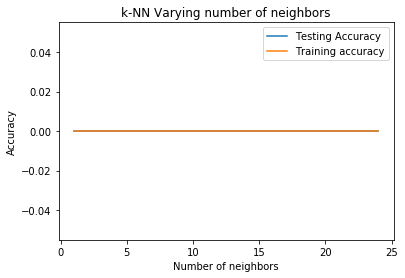

In [0]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [0]:
# best k:
idx = np.where(test_accuracy == max(test_accuracy))
k = neighbours[idx][0]
knn = KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())
print(skmt.classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4657
           1       0.32      0.30      0.31      1343

    accuracy                           0.70      6000
   macro avg       0.56      0.56      0.56      6000
weighted avg       0.69      0.70      0.70      6000



In [0]:
#ROC for KNN

### Model 2 - Support Vector Machine


In [0]:
from sklearn import svm

#Linear classifier with cost function = 1
l_svm_clf = svm.SVC(C = 1, kernel = 'linear')
# the following line takes forever
l_svm_clf.fit(X_train, y_train) 

r_svm_clf = svm.SVC(C= 1, kernel = 'rbf')



### Model 3 - Decision Trees
